In [1]:
import pandas as pd
import numpy as np

**Exercise 1**: 

(a) Reduce the "ZIP-code"-dataset to two dimensions using Oja’s algorithm and plot thepoint cloud of the data set highlighting each class.

(b) Try one of the previously implemented classifiers (k-NN or Logistic Regression) on thetwo-dimensional dataset.

In [2]:
#train = pd.read_csv('/Users/Eva/Downloads/zip.train', header=None, sep=' ')
#train.drop(257,axis=1,inplace=True)
#test = pd.read_csv('/Users/Eva/Downloads/zip.test', header=None, sep=' ')

train = pd.read_csv('zip.train', header=None, sep=' ')
train.drop(257,axis=1,inplace=True)
test = pd.read_csv('zip.test', header=None, sep=' ')


**Oja's algorithm**

In [39]:
X_features = train.iloc[:,1:]
Labels = train.iloc[:,0]

X = X_features-np.mean(X_features, axis=0).values # VB: i don't know if this is correct
gamma = 1
def oja(X, gamma):
    # initalize w: 
    w = np.random.uniform(size=(X.shape[1]))
    for i in range(X.shape[0]):
        x = np.array(X.iloc[i])
        w = w + (gamma*w)*x*(x-(w*x)*w)
        w = w / np.linalg.norm(w)
        gamma = 1/loop_counter
    return(w)

def pca(X, gamma):
    w1 = oja(X, gamma)
    X_new = X - (w*X)*w
    w2 = oja(X_new, gamma)
    W = np.matrix([w1, w2]).T
    Y = np.matmul(np.matrix(X), W)
    return(Y)
        
Y = pca(X, gamma)

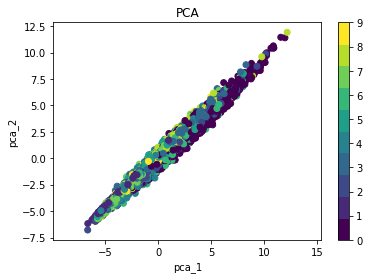

In [54]:
import matplotlib.pyplot as plt

x = np.array(Y.T[0])[0] # this is a somewhat akward of getting x, feel free to improve it
y = np.array(Y.T[1])[0]

labs_int = [int(x) for x in Labels]
plt.scatter(x, y, c = labs_int, cmap=plt.get_cmap('viridis',len(set(Labels))))
plt.colorbar(ticks=np.arange(0,len(set(labs_int))))
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('PCA')
plt.axis('equal')
plt.show()

**Exercise 2**: 

Use your implementation of PCA on the greyscale-version of the "LFWcrop Face"-Dataset1.Visualize the first two principal components as Eigenfaces.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
image_height: 50
image_width: 37
(5,)


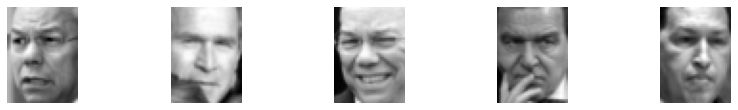

In [10]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from matplotlib import pyplot as plt


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("image_height: %d" % h)
print("image_width: %d" % w)


def show_faces(X):
    num_samples = 5
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(3, 7.5, i + 1)
        img = sample_digits[i].reshape((h, w))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
show_faces(X)